In [181]:
import pandas as pd

page_count = pd.read_csv("page_count.csv")
page_time = pd.read_csv("page_time.csv", delimiter=',')
perc = pd.read_csv("perc.csv", delimiter=',')

In [182]:
from datetime import datetime

page_count.head(2)

,Дата,Перегляди сторінок
0,01.03.22,12248
1,02.03.22,13466


In [183]:
page_time.head(2)

,Дата,Час завантаження сторінки
0,01.03.22,"3,19"
1,02.03.22,"5,70"


In [184]:
page_time.head(2)

,Дата,Час завантаження сторінки
0,01.03.22,"3,19"
1,02.03.22,"5,70"


In [185]:
page_count["Дата"] = pd.to_datetime(page_count["Дата"], format='%d.%m.%y').dt.date
page_time["Дата"] = pd.to_datetime(page_time["Дата"], format='%d.%m.%y').dt.date
perc["Дата"] = pd.to_datetime(perc["Дата"], format='%d.%m.%y').dt.date

In [186]:
page_time['Час завантаження сторінки']=page_time['Час завантаження сторінки'].str.replace(',', '.').astype('float32')
perc['Відсоток відмов']=perc['Відсоток відмов'].str.replace('%','').str.replace(',', '.').astype('float32')

In [187]:
page_time.head(2)

,Дата,Час завантаження сторінки
0,2022-03-01,3.19
1,2022-03-02,5.70


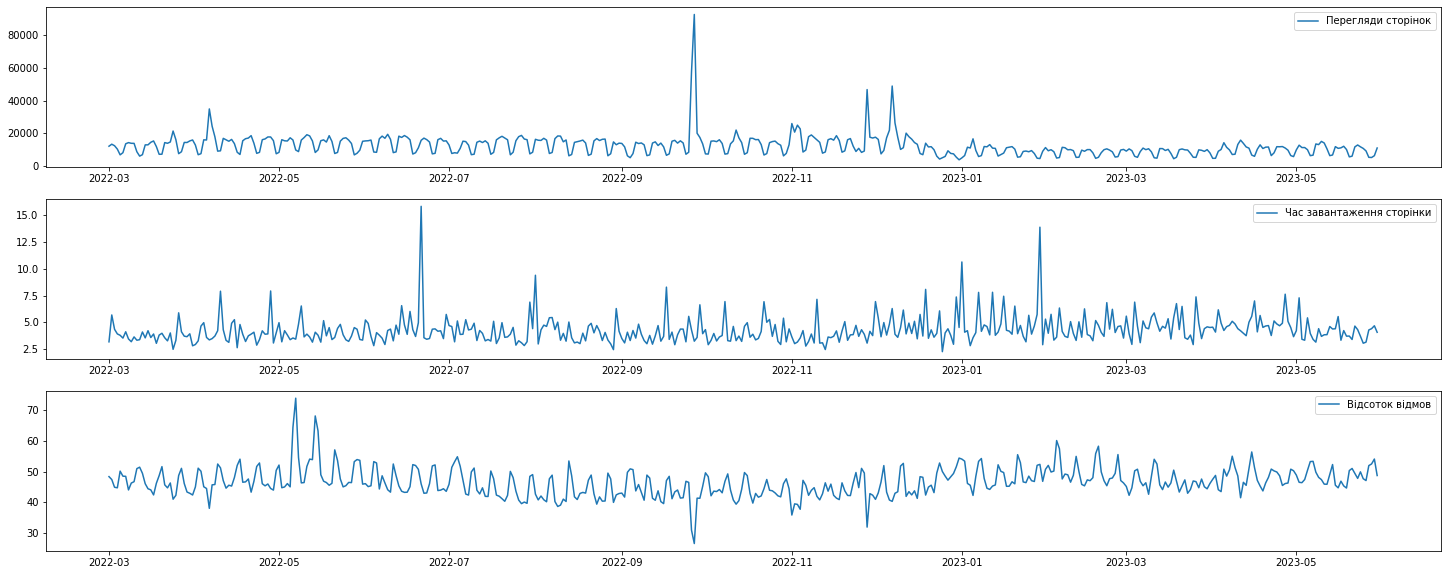

In [188]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10]


plt.subplot(311), plt.plot(page_count['Дата'].astype("datetime64[ns]"), page_count['Перегляди сторінок'], label = 'Перегляди сторінок')
plt.legend()
plt.subplot(312), plt.plot(page_time['Дата'].astype("datetime64[ns]"),page_time['Час завантаження сторінки'], label='Час завантаження сторінки')
plt.legend()
plt.subplot(313), plt.plot(perc['Дата'].astype("datetime64[ns]"),perc['Відсоток відмов'],label='Відсоток відмов')
plt.legend()

# Statistical Methods

## Mean Absolute Deviation
MAD helps us find anomalies by checking how far away data points are from the median (the middle value). 

In [233]:
import numpy as np

def mead_abs_dev_anomaly(series):
    median = series.median()
    absolute_deviations = np.abs(series - median)
    mad = absolute_deviations.mean()
    threshold = 3 * mad
    outliers = series[series > threshold]
    print("\nМедіана:", median, "\nСередня абсолютна різниця між значеннями та медіаною: ", mad, "\nКількість аномалій: ", len(outliers))
    return outliers

page_count_mad_anomaly = mead_abs_dev_anomaly(page_count['Перегляди сторінок'])
page_count['mad_anomaly'] = [True if x in page_count_mad_anomaly.values else False for x in page_count['Перегляди сторінок']]

page_time_mad_anomaly = mead_abs_dev_anomaly(page_time['Час завантаження сторінки'])
page_time['mad_anomaly'] =[True if x in page_time_mad_anomaly.values else False for x in page_time['Час завантаження сторінки']]

perc_mad_anomaly = mead_abs_dev_anomaly(perc['Відсоток відмов'])
perc['mad_anomaly'] = [True if x in perc_mad_anomaly.values else False for x in perc['Відсоток відмов']]


Медіана: 11755.0 
Середня абсолютна різниця між значеннями та медіаною:  16536.82932166302 
Кількість аномалій:  3

Медіана: 3.99 
Середня абсолютна різниця між значеннями та медіаною:  0.8357675 
Кількість аномалій:  452

Медіана: 46.315002 
Середня абсолютна різниця між значеннями та медіаною:  3.4864695 
Кількість аномалій:  456


In [227]:
page_time_mad_anomaly

0      3.19
1      5.70
2      4.36
3      3.93
4      3.80
       ... 
451    3.16
452    4.30
453    4.42
454    4.69
455    4.08
Name: Час завантаження сторінки, Length: 452, dtype: float32

## Z-score Method
Z-score shows us how far a data point is from the average, in terms of standard deviations.

In [243]:
def z_anomaly(series):
    mean = series.mean()  
    std_dev = series.std()
    z_scores = (series - mean)/std_dev  
    threshold = 3
    outliers = series[z_scores > threshold] 
    print("\nКількість аномалій: ", len(outliers))

    return outliers
    
page_count_z_anomaly = z_anomaly(page_count['Перегляди сторінок'])
page_count['z_anomaly'] = [True if x in page_count_z_anomaly.values else False for x in page_count['Перегляди сторінок']]

page_time_z_anomaly = z_anomaly(page_time['Час завантаження сторінки'])
page_time['z_anomaly'] =[True if x in page_time_z_anomaly.values else False for x in page_time['Час завантаження сторінки']]

perc_z_anomaly = z_anomaly(perc['Відсоток відмов'])
perc['z_anomaly'] = [True if x in perc_z_anomaly.values else False for x in perc['Відсоток відмов']]


Кількість аномалій:  1

Кількість аномалій:  5

Кількість аномалій:  4


# Machine Learning Method

## Isolation Forest

Isolation Forest is a smart way to find data that doesn't fit in, without needing to know what 'normal' looks like first. Let's walk through how to use it with Python:

In [191]:
from sklearn.ensemble import IsolationForest

def is_forest_anomaly(X):
    model = IsolationForest(n_estimators=100, contamination=0.1)
    model.fit(X) 
    y_pred = model.predict(X)
    return y_pred

page_count_is_forest_anomaly = is_forest_anomaly(page_count[['Перегляди сторінок']])
page_count['anomaly_is_forest'] = [True if x == -1 else False for x in page_count_is_forest_anomaly]

page_time_is_forest_anomaly = is_forest_anomaly(page_time[['Час завантаження сторінки']])
page_time['anomaly_is_forest'] = [True if x == -1 else False for x in page_time_is_forest_anomaly]

perc_is_forest_anomaly = is_forest_anomaly(perc[['Відсоток відмов']])
perc['anomaly_is_forest'] = [True if x == -1 else False for x in perc_is_forest_anomaly]


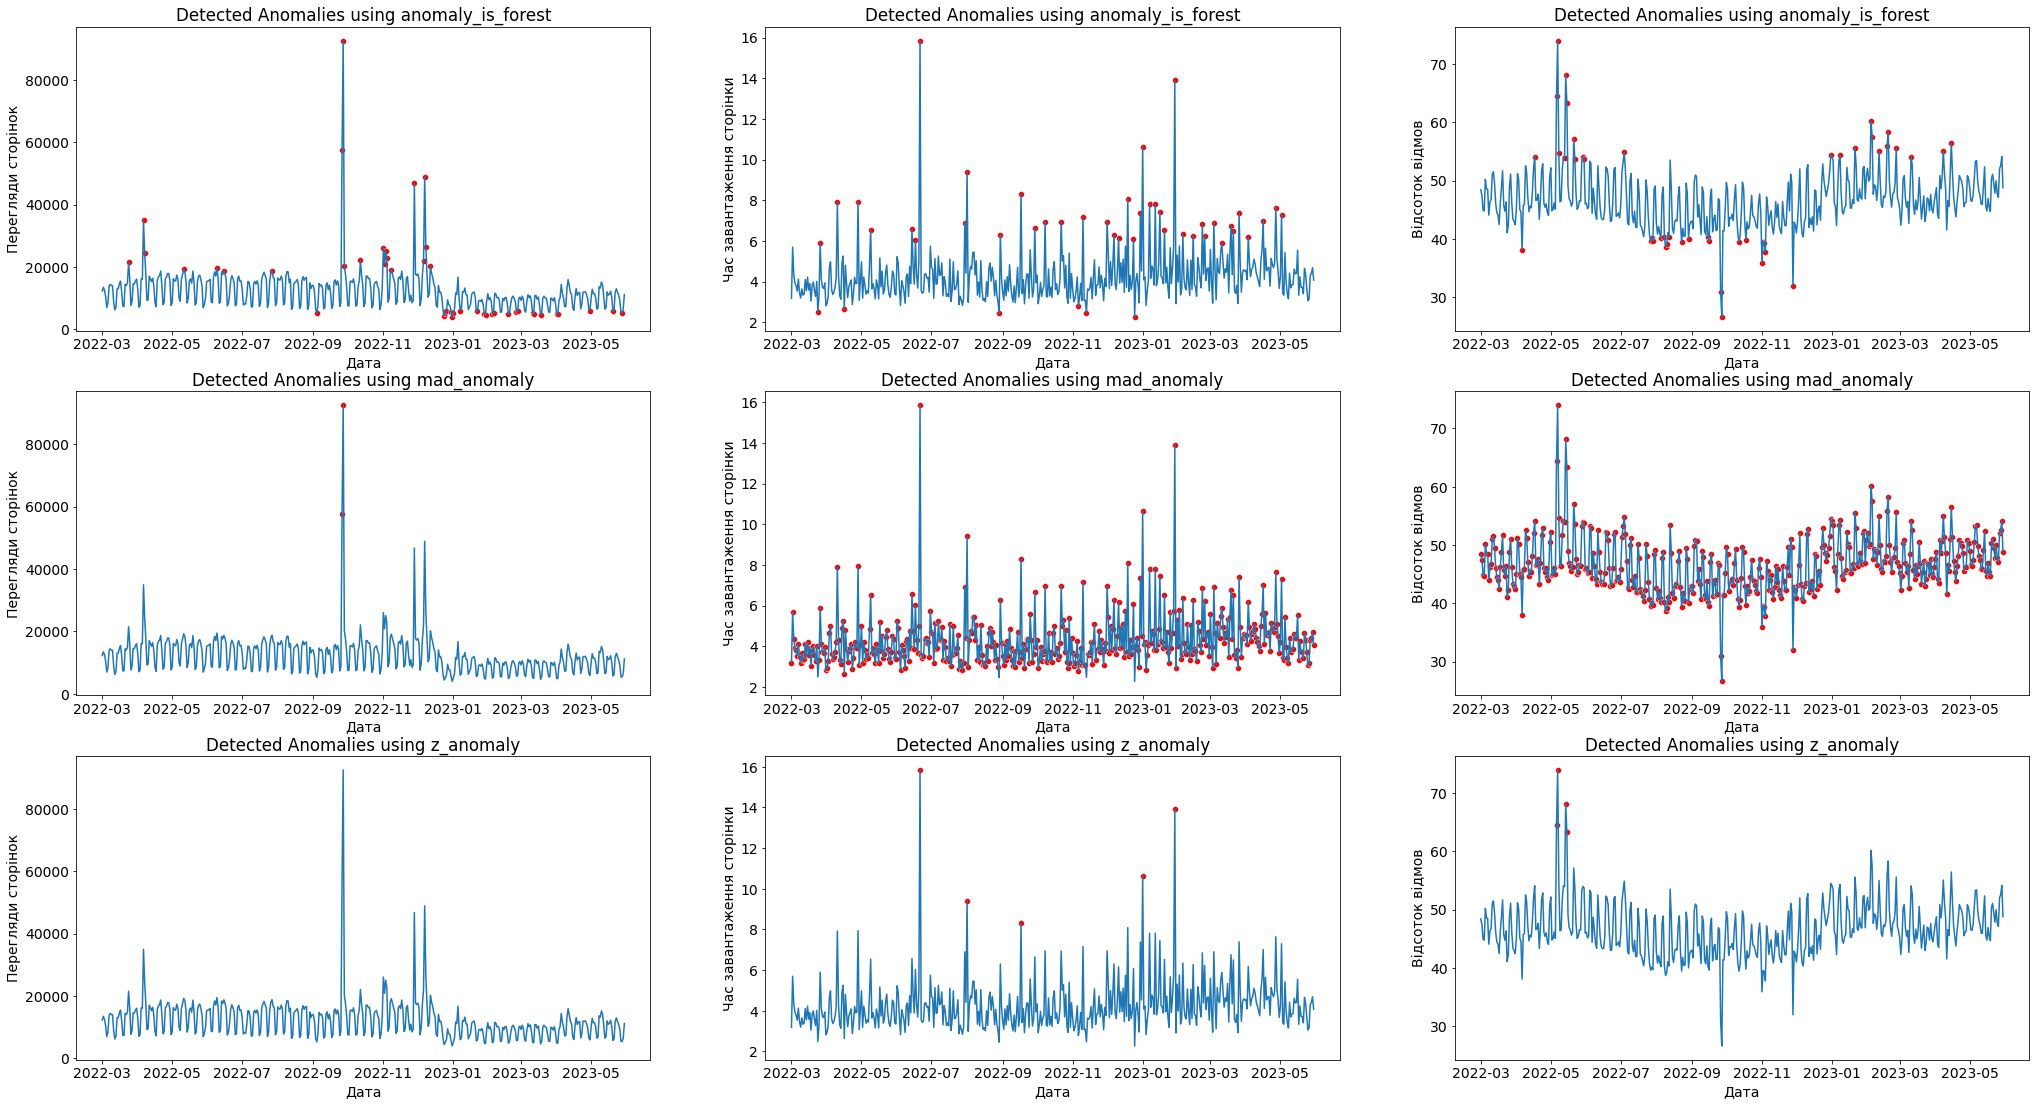

In [242]:
import seaborn as sns
import matplotlib 
matplotlib.rcParams.update({'font.size': 14})

dfs = [page_count,page_time,perc]
variable = ['Перегляди сторінок','Час завантаження сторінки','Відсоток відмов']
anomaly = sorted(['mad_anomaly','z_anomaly','anomaly_is_forest']*3)

plt.rcParams['figure.figsize'] = [35, 19]

for i in range (1,10):
        
    ax = plt.subplot(3,3,i)
    
    sns.lineplot(data=dfs[(i-1)%3], x='Дата', y=variable[(i-1)%3],ax=ax)
    sns.scatterplot(data=dfs[(i-1)%3][dfs[(i-1)%3][anomaly[i-1]]==True], x='Дата', y=variable[(i-1)%3], color='red',ax=ax)

    plt.ylabel(variable[(i-1)%3])
    plt.title('Detected Anomalies using ' + anomaly[i-1])
